# 3.2-Clustering and further filtering

**Inés Sentís**

Date of execution 

In [1]:
Sys.Date()

[1] "2025-01-10"

## Introduction

Normalize data and do unsupervised clustering for each fraction of the experiment

In [2]:
sample <- "41BBctr"

## Libraries

In [3]:
suppressMessages(suppressWarnings({
library(Seurat)
library(here)
library(glue)
library(tidyverse)
library(grid)
library(gridExtra)
library(ggplot2)
library(scater) 
library(scran)
}))

## Parameters

In [4]:
#dr_here(show_reason = TRUE)
source(here("SCGRES_124_125/sc_analysis/misc/paths.R"))
source(here("SCGRES_124_125/sc_analysis/misc/variables.R"))
source(here("utils/bin.R"))

set.seed(0)

## Load data

In [5]:
seurat_obj <- readRDS(here(glue("{clust}/{robj_dir}/dimred_combined_object_{sample}.rds")))

In [6]:
var_name <- paste0("comp_", sample)
dcomp <- get(var_name)

### First clustering to localize doublets

In [7]:
reso = 0.5

In [8]:
seurat_obj <- FindNeighbors(seurat_obj, reduction = "pca", dims = dcomp)
seurat_obj <- FindClusters(seurat_obj, resolution = reso)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9024
Number of edges: 293686

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8666
Number of communities: 9
Elapsed time: 1 seconds


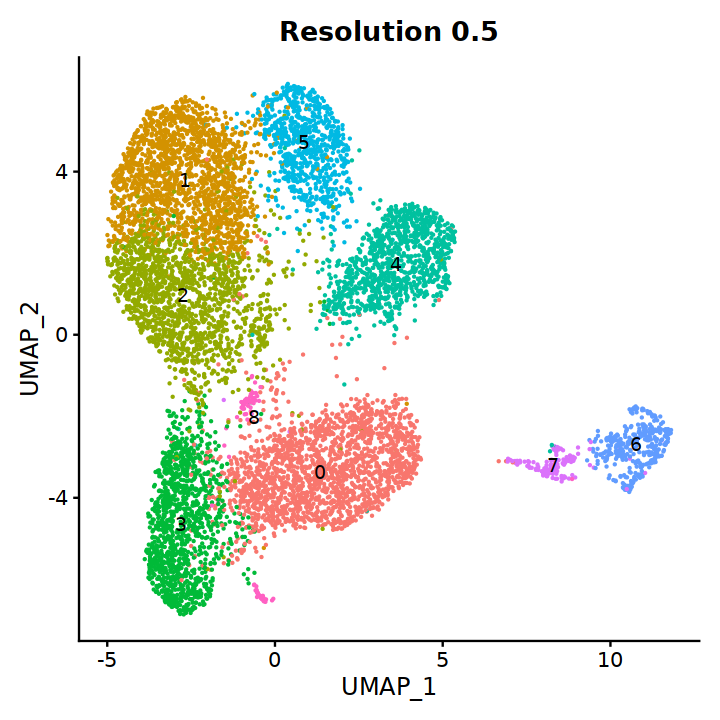

In [9]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(seurat_obj, reduction = "umap", label = T)+ NoLegend() +
  labs(title=glue("Resolution {reso}")) + theme(plot.title = element_text(hjust = 0.5))

In [10]:
rna.markers <- FindAllMarkers(seurat_obj, min.pct=0.1, 
                              logfc.threshold=0.1, 
                              random.seed=0, 
                              max.cells.per.ident=1000,
                              only.pos=TRUE)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8



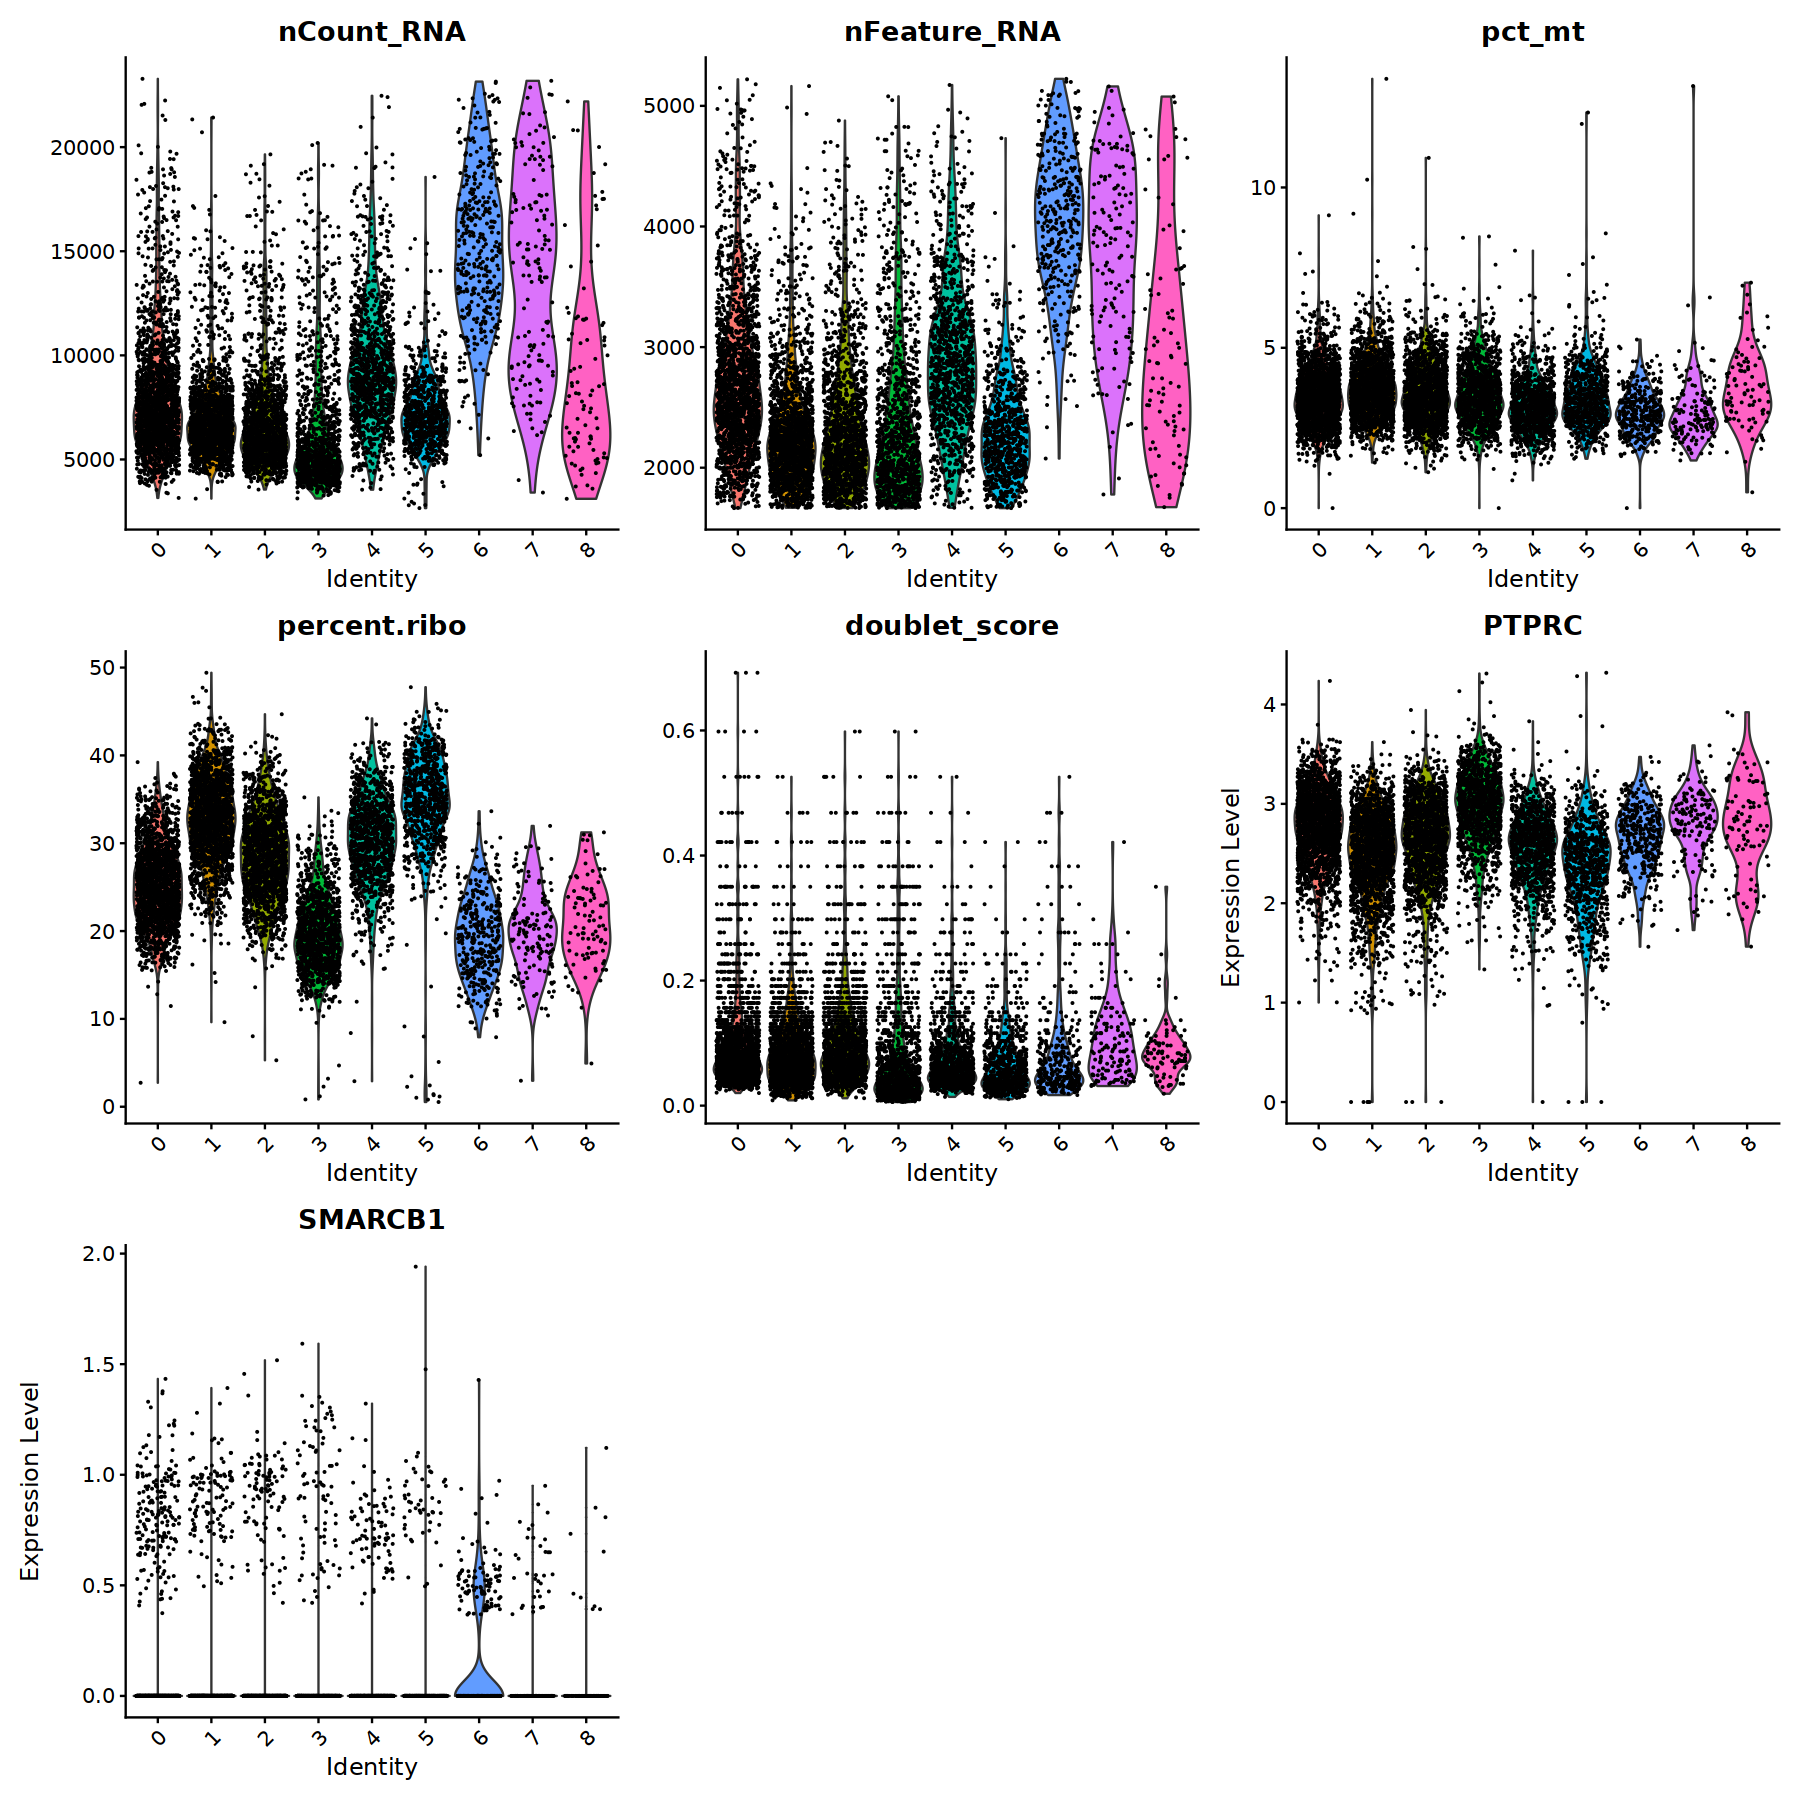

In [11]:
options(repr.plot.width = 15, repr.plot.height = 15, warn=-1,verbose = FALSE)

con_vars <- c("nCount_RNA", "nFeature_RNA", "pct_mt", "percent.ribo", 
              "doublet_score", "PTPRC", "SMARCB1")

VlnPlot(seurat_obj,feature=con_vars, ncol=3, pt.size = 0)

In [12]:
c <- 8

rna.markers %>% 
  dplyr::filter(cluster == c) %>% 
  arrange(desc(avg_log2FC)) %>% head(n=20)

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene  
TYROBP   1.630247e-85 2.654230   0.385 0.002  4.206689e-81 8       TYROBP
TRDC    1.562463e-146 2.630916   0.945 0.034 4.031780e-142 8       TRDC  
TRDV1    3.342834e-28 2.619461   0.429 0.063  8.625848e-24 8       TRDV1 
GNLY3    3.666671e-31 2.322654   0.835 0.325  9.461479e-27 8       GNLY  
NKG73    9.580812e-22 2.261718   0.912 0.567  2.472233e-17 8       NKG7  
KLRD11   1.125295e-75 2.131534   0.549 0.037  2.903711e-71 8       KLRD1 
KLRC1    1.916079e-58 2.116882   0.418 0.018  4.944249e-54 8       KLRC1 
KLRB11   3.164870e-28 1.940001   0.495 0.108  8.166630e-24 8       KLRB1 
FCER1G2  6.287583e-15 1.881458   0.451 0.170  1.622448e-10 8       FCER1G
CMC11    1.523487e-11 1.778354   0.604 0.292  3.931206e-07 8       CMC1  
KLRC22   1.216979e-21 1.704194   0.451 0.115  3.140293e-17 8       KLRC2 
TRGV9    2.712201e-46 1.695387   0.451 0.039  6.998564e-42 8       TRGV9 
XCL23    1.909524e-32 1.658128   0.538 0.094  4.927336e-28 8       XCL2  
GZMB3    8.564103e-28 1.650420   0.571 0.143  2.209881e-23 8       GZMB  
CCL41    2.658846e-24 1.618511   0.571 0.145  6.860887e-20 8       CCL4  
TRGV4    1.341580e-31 1.592398   0.308 0.039  3.461813e-27 8       TRGV4 
CTSW3    9.180813e-24 1.481086   0.967 0.795  2.369017e-19 8       CTSW  
PRF12    1.494202e-21 1.468378   0.890 0.568  3.855638e-17 8       PRF1  
IL2RB2   4.563904e-33 1.459075   0.945 0.441  1.177670e-28 8       IL2RB 
LYST1    7.336380e-17 1.377186   0.681 0.328  1.893079e-12 8       LYST

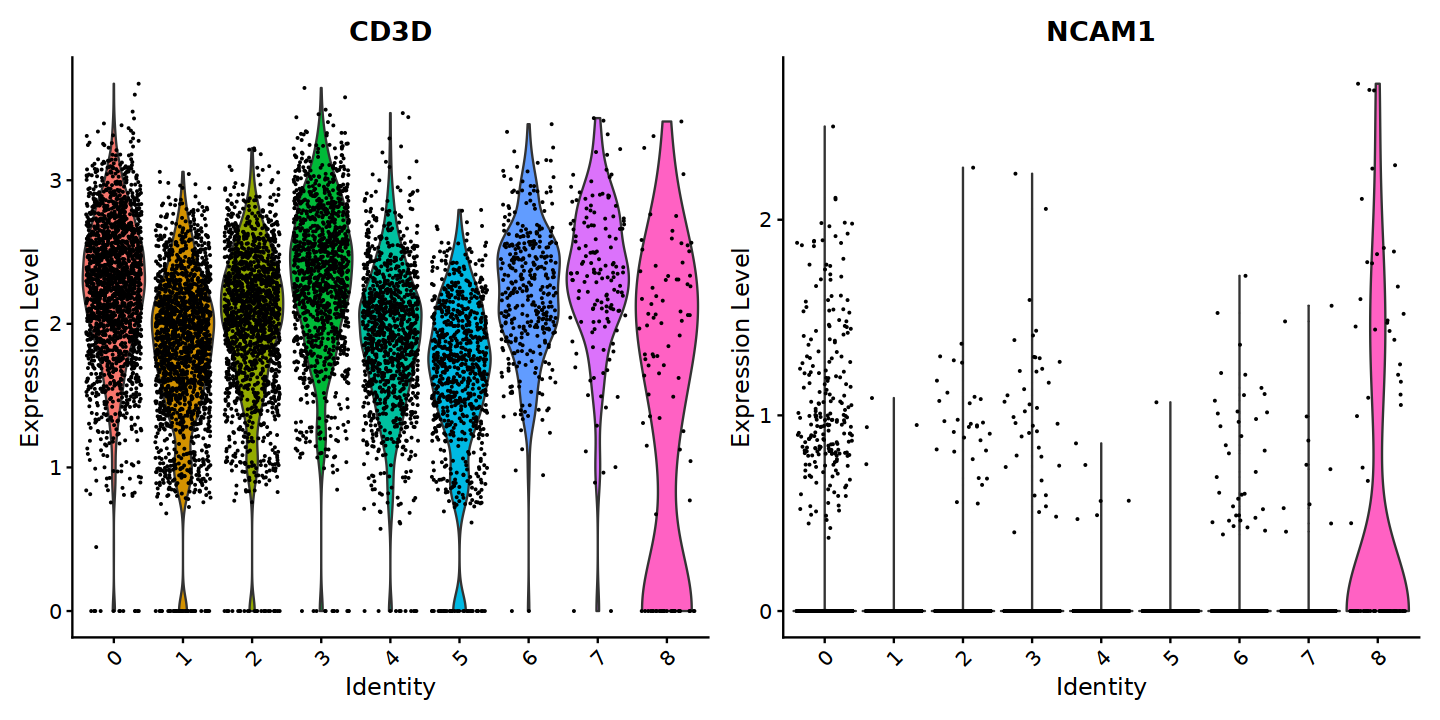

In [13]:
options(repr.plot.width = 12, repr.plot.height = 6, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, feature=c("CD3D", "NCAM1"))

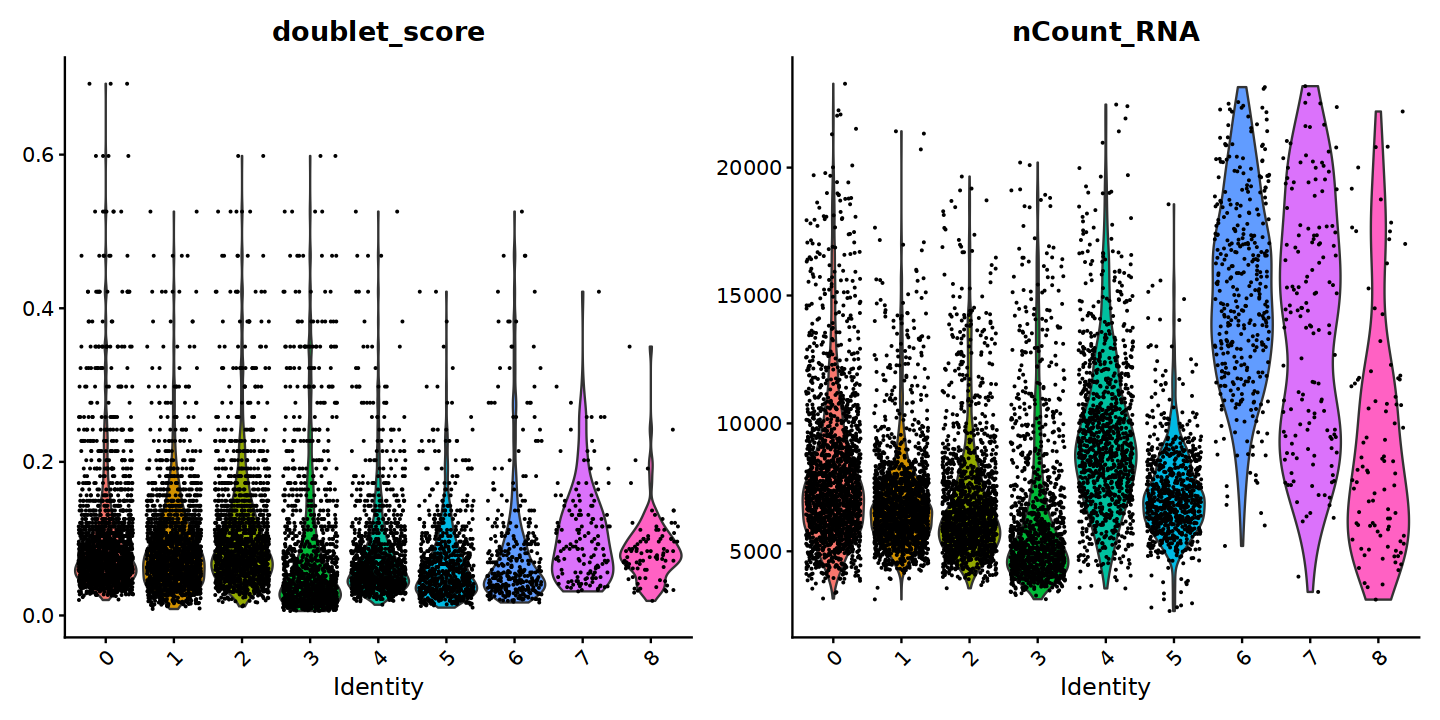

In [14]:
options(repr.plot.width = 12, repr.plot.height = 6, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj,feature=c("doublet_score", "nCount_RNA"), ncol=2)

NKs

In [15]:
seurat_obj <- FindSubCluster(
  seurat_obj,
  8,
  graph.name = "RNA_snn",
  subcluster.name = "subclustering",
  resolution = 0.1,
  algorithm = 1
)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 91
Number of edges: 1520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9451
Number of communities: 2
Elapsed time: 0 seconds


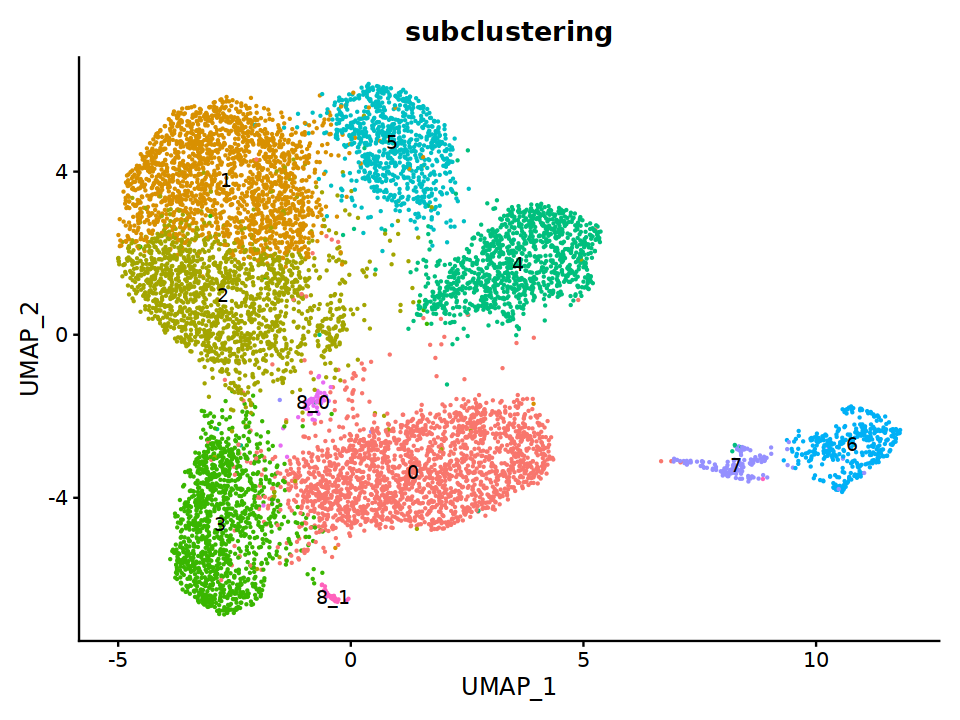

In [16]:
options(repr.plot.width = 8, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(seurat_obj, reduction = "umap", group.by = "subclustering", label=T) + NoLegend()

In [17]:
seurat_obj <- SetIdent(seurat_obj, value=seurat_obj@meta.data$subclustering)

In [18]:
rna.markers <- FindAllMarkers(seurat_obj, min.pct=0.1, logfc.threshold=0.1, 
                              random.seed=0, max.cells.per.ident=2000, 
                              only.pos=TRUE)

Calculating cluster 2

Calculating cluster 1

Calculating cluster 4

Calculating cluster 3

Calculating cluster 0

Calculating cluster 5

Calculating cluster 6

Calculating cluster 8_1

Calculating cluster 7

Calculating cluster 8_0



In [19]:
c <- "8_1"

rna.markers %>% 
  dplyr::filter(cluster == c) %>% 
  arrange(desc(avg_log2FC)) %>% head(n=20)

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene  
TYROBP   0.000000e+00 3.775829   0.921 0.002  0.000000e+00 8_1     TYROBP
NKG72    2.424231e-24 3.256127   1.000 0.569  6.255487e-20 8_1     NKG7  
GNLY2    7.082886e-30 3.138087   1.000 0.327  1.827668e-25 8_1     GNLY  
KLRD11  7.658444e-130 3.097036   0.921 0.039 1.976185e-125 8_1     KLRD1 
KLRC1   8.092266e-195 3.074357   0.868 0.019 2.088128e-190 8_1     KLRC1 
KLRB11   3.580563e-49 2.958020   0.842 0.109  9.239286e-45 8_1     KLRB1 
FCER1G2  1.140882e-50 2.904596   0.974 0.170  2.943931e-46 8_1     FCER1G
CMC11    4.965894e-16 2.731372   0.737 0.294  1.281399e-11 8_1     CMC1  
CCL41    3.007280e-32 2.554040   0.868 0.146  7.759984e-28 8_1     CCL4  
TRDC    3.452824e-112 2.470333   0.921 0.040 8.909667e-108 8_1     TRDC  
XCL22    1.088512e-20 2.334445   0.553 0.096  2.808797e-16 8_1     XCL2  
GZMB2    4.004481e-27 2.278277   0.737 0.145  1.033316e-22 8_1     GZMB  
KLRC22   4.872937e-23 2.239861   0.632 0.116  1.257413e-18 8_1     KLRC2 
PRF12    2.198013e-23 2.209325   1.000 0.569  5.671752e-19 8_1     PRF1  
NCAM11   8.787233e-89 2.104890   0.763 0.040  2.267458e-84 8_1     NCAM1 
NCR1     0.000000e+00 1.903808   0.816 0.003  0.000000e+00 8_1     NCR1  
IL2RB2   1.843198e-24 1.877531   1.000 0.444  4.756189e-20 8_1     IL2RB 
LYST1    5.495439e-18 1.867909   0.816 0.329  1.418043e-13 8_1     LYST  
SH2D1B  1.507602e-269 1.851352   0.658 0.001 3.890216e-265 8_1     SH2D1B
LDB2    2.920649e-205 1.845247   0.605 0.003 7.536442e-201 8_1     LDB2

### Remove Cells

In [20]:
seurat_obj <- subset(x = seurat_obj, idents=c("8_1"), invert=TRUE)

In [21]:
seurat_obj <- DietSeurat(
  seurat_obj,
  counts = TRUE,
  data = TRUE,
  scale.data = FALSE,
  features = NULL,
  assays = NULL,
  dimreducs = FALSE,
  graphs = NULL
)

In [22]:
print(table(rowSums(as.matrix(seurat_obj[['RNA']]@counts)) == 0))
  
keep_genes <- data.frame(rowSums(as.matrix(seurat_obj[['RNA']]@counts)) != 0)
colnames(keep_genes) <- "logical"
keep_genes <- subset(keep_genes, logical==TRUE)
seurat_obj[['RNA']]@counts <- seurat_obj[['RNA']]@counts[rownames(keep_genes), ]
seurat_obj[['RNA']]@data <- seurat_obj[['RNA']]@data[rownames(keep_genes), ]
seurat_obj


FALSE  TRUE 
25435   369 


An object of class Seurat 
25435 features across 8986 samples within 1 assay 
Active assay: RNA (25435 features, 0 variable features)

## Re-do embedding and clustering

In [23]:
seurat_obj <- NormalizeData(
  seurat_obj,
  normalization.method = "LogNormalize",
  scale.factor = 1e4
)

In [24]:
sce <- as.SingleCellExperiment(seurat_obj)
sce

class: SingleCellExperiment 
dim: 25435 8986 
metadata(0):
assays(2): counts logcounts
rownames(25435): AL627309.1 AL627309.5 ... AC004556.3 AC007325.4
rowData names(0):
colnames(8986): AAACCTGAGAACTGTA-1 AAACCTGAGAATGTTG-1 ...
  TTTGTCATCGTATCAG-1 TTTGTCATCTTGTCAT-1
colData names(19): orig.ident nCount_RNA ... subclustering ident
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

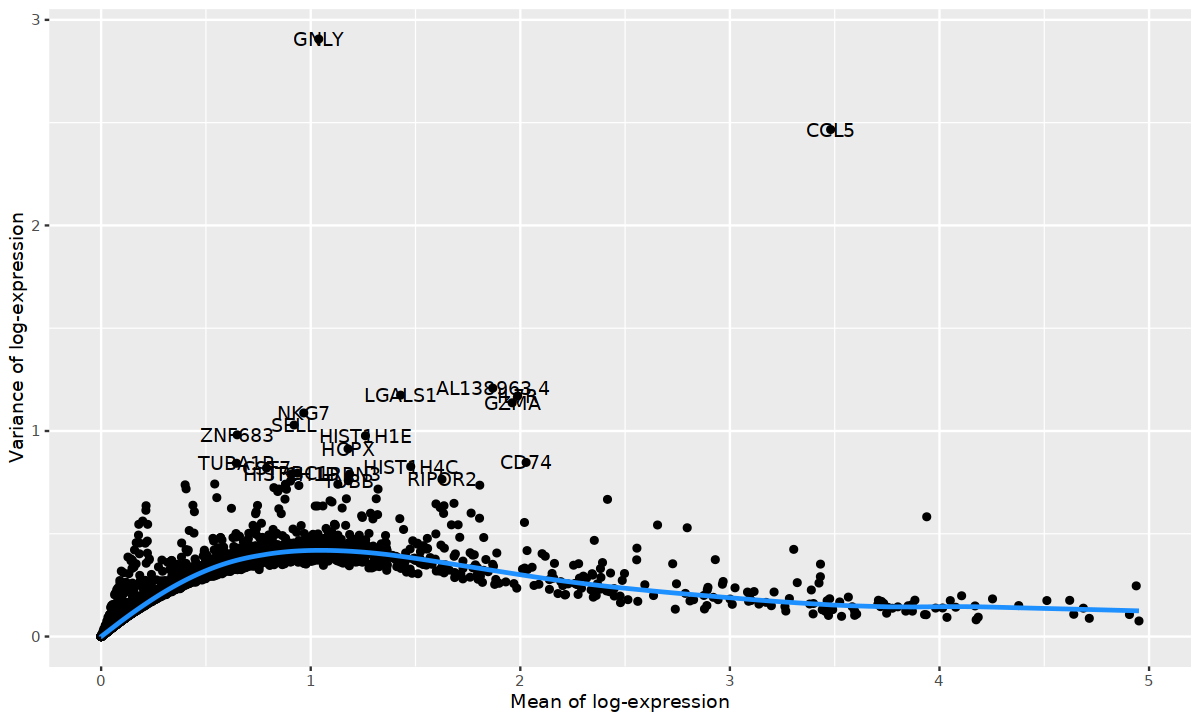

In [25]:
options(repr.plot.width = 10, repr.plot.height = 6, warn=-1,verbose = FALSE)
gene_var <- modelGeneVar(sce)

tops <- gene_var %>% 
    as.data.frame() %>% 
    arrange(desc(total)) %>% 
    head(n=20)

gene_var %>% 
  as.data.frame() %>% 
  ggplot(aes(mean, total)) +
  geom_point() +
  geom_line(aes(y = tech), colour = "dodgerblue", size = 1) +
  labs(x = "Mean of log-expression", y = "Variance of log-expression")+
  geom_text(data=tops, aes(mean,total,label=rownames(tops)))

In [26]:
hvgs <- getTopHVGs(gene_var,fdr.threshold = 0.05)
length(hvgs)

[1] 325

In [27]:
# remove TCR genes
hvgs <- hvgs[!grepl("^TR[AB][VJC]", hvgs)]
length(hvgs)

VariableFeatures(seurat_obj) <- hvgs

[1] 228

In [28]:
seurat_obj <- seurat_obj %>%
  ScaleData(features=hvgs) %>% 
  RunPCA(features=hvgs)

Centering and scaling data matrix

PC_ 1 
Positive:  LTB, IL7R, FTL, PASK, EEF1B2, RIPOR2, CCR7, SELL, TCF7, NELL2 
	   MTRNR2L12, CD52, AL138963.4, TMSB10, LRRN3, MALAT1, S100B, S100A4, KRT1, KIF5C 
	   RPLP0, KLRB1, HPGDS, LINC02315, CTSW, TRDV3, LINC02109, GZMK, KIR2DL3, FCRL3 
Negative:  UBE2C, TOP2A, ASPM, KIFC1, CDK1, HJURP, CKAP2L, DLGAP5, RRM2, KNL1 
	   GTSE1, BIRC5, CDCA8, KIF15, TPX2, NUSAP1, HMMR, HIST1H3B, CENPF, MKI67 
	   CCNB2, DIAPH3, KIF14, CDKN3, PLK1, STMN1, HIST1H1B, CDC20, HIST1H3C, PCLAF 
PC_ 2 
Positive:  EEF1B2, IL7R, RPLP0, SELL, CCR7, TCF7, IFITM1, RIPOR2, PASK, LTB 
	   LRRN3, AL138963.4, IFITM2, KRT1, TMSB10, PDE3B, TUBA1B, RRM2, HMMR, KIFC1 
	   HIST1H4C, UBE2C, HIST1H3B, CDK1, HJURP, GTSE1, HIST1H3G, CDCA8, TUBB, DIAPH3 
Negative:  CST7, NKG7, GNLY, CCL4, ALOX5AP, HLA-DRB1, ZNF683, GZMH, CCL5, CD2 
	   GZMB, RCBTB2, CD74, CXCR3, LINC02694, HLA-DRA, HLA-DQA1, JAML, GZMK, LSP1 
	   AOAH, CXCR6, PPP1R14B, AC013652.1, IL32, KLRK1, CTSW, HOPX, GZMA, CD52 
PC_ 

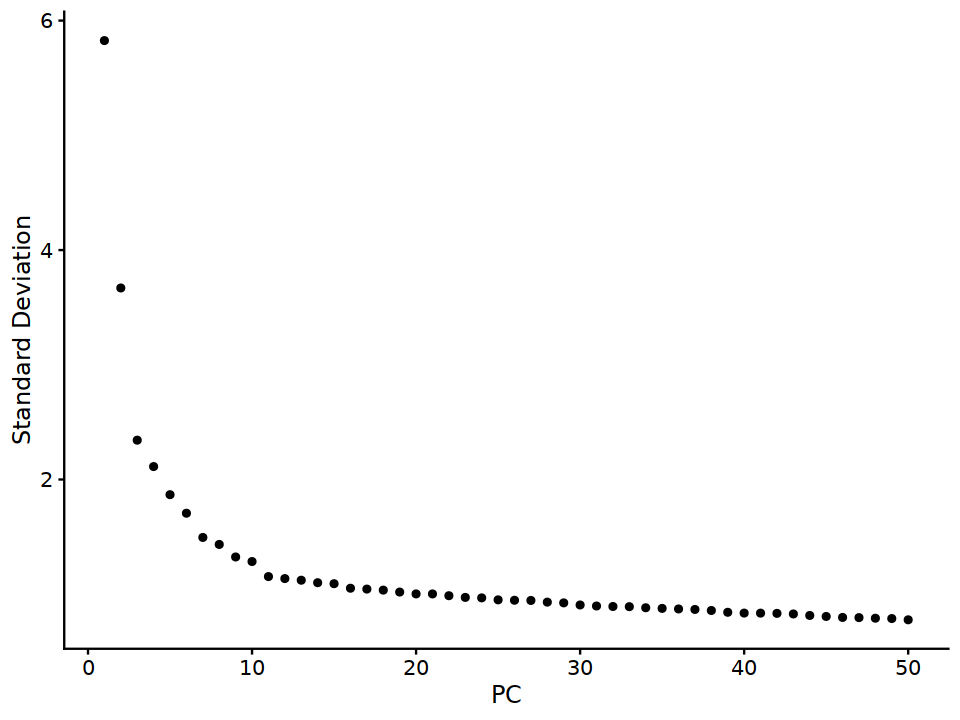

In [29]:
options(repr.plot.width = 8, repr.plot.height = 6)
ElbowPlot(seurat_obj, n=50)

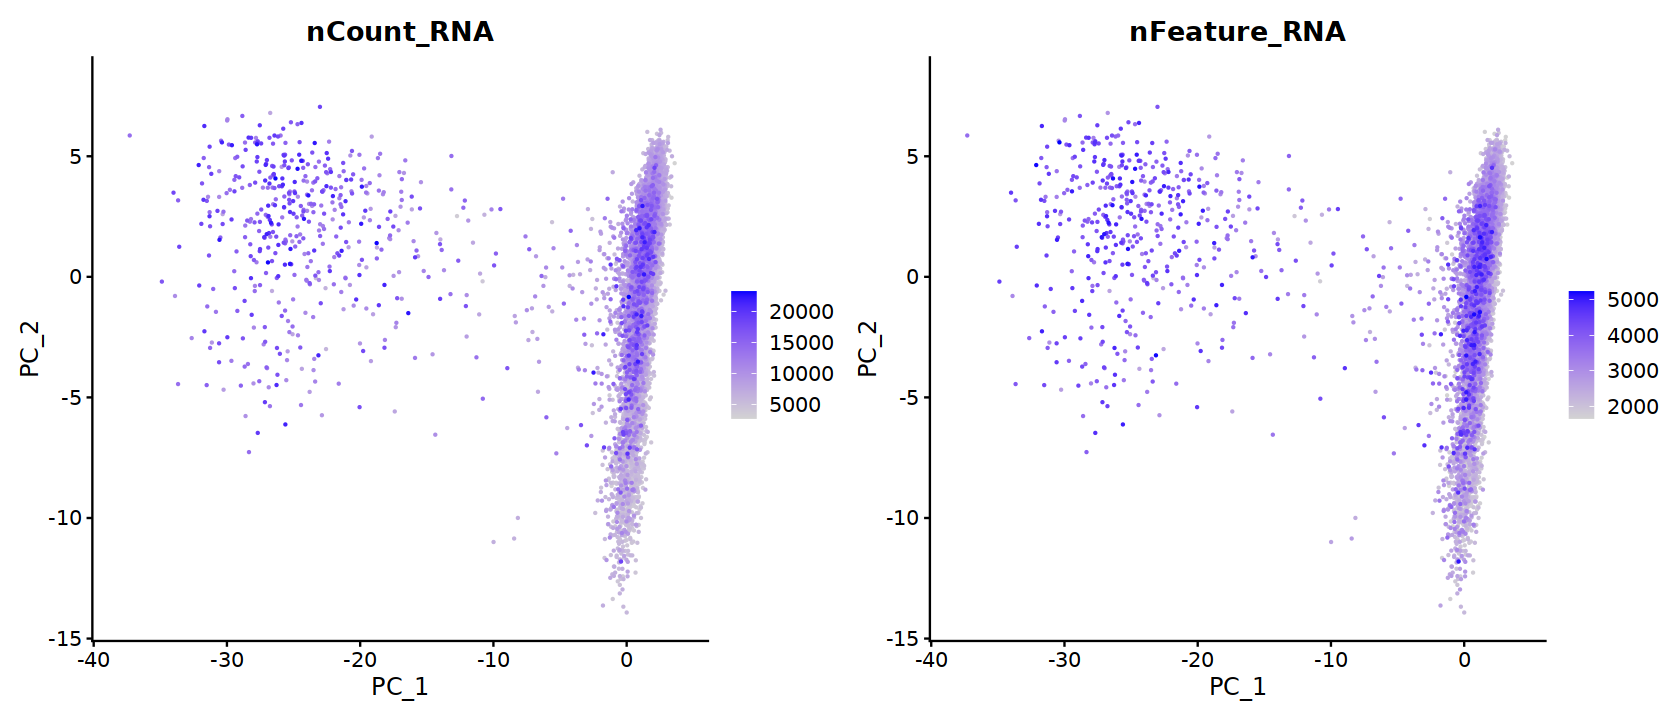

In [30]:
options(repr.plot.width = 14, repr.plot.height = 6)
FeaturePlot(object = seurat_obj, reduction = "pca",
        features = c("nCount_RNA","nFeature_RNA"), order=T)

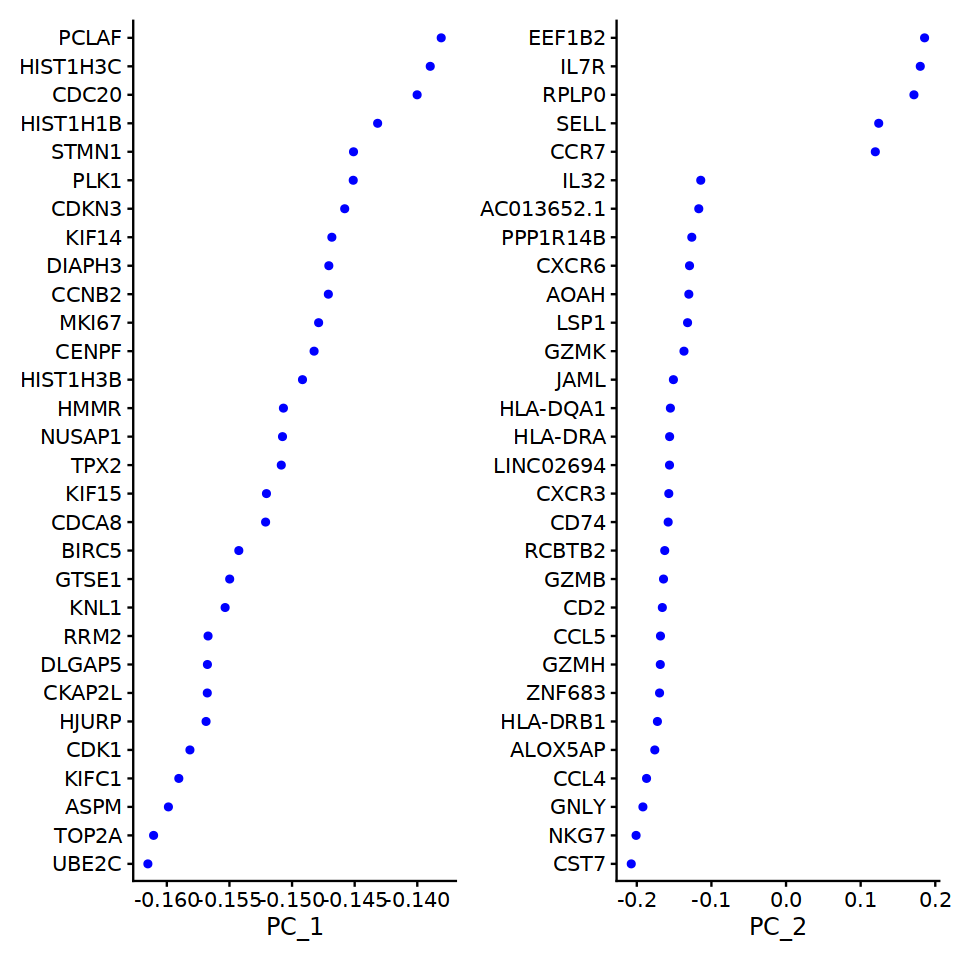

In [31]:
options(repr.plot.width = 8, repr.plot.height = 6, warn=-1,verbose = FALSE)
VizDimLoadings(seurat_obj, dims = 1:2, reduction = "pca")

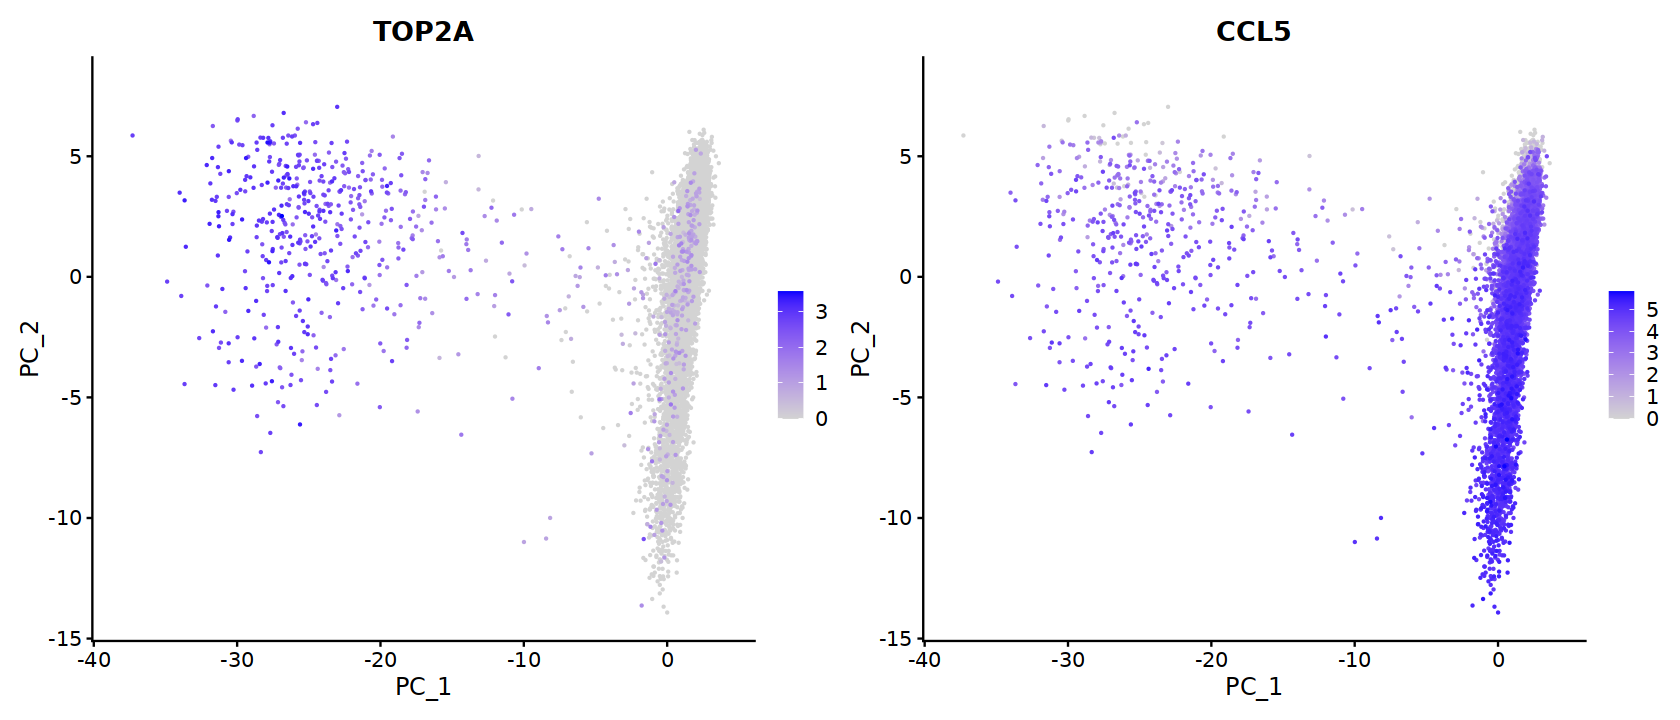

In [32]:
options(repr.plot.width = 14, repr.plot.height = 6)
FeaturePlot(object = seurat_obj, reduction = "pca",
        features = c("TOP2A","CCL5"), order=T)

In [33]:
seurat_obj <- RunUMAP(
  seurat_obj,
  dims = dcomp,
  reduction = "pca",
  reduction.name = "umap",
  reduction.key = "UMAP_"
)

11:43:45 UMAP embedding parameters a = 0.9922 b = 1.112

11:43:45 Read 8986 rows and found 12 numeric columns

11:43:45 Using Annoy for neighbor search, n_neighbors = 30

11:43:45 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:43:46 Writing NN index file to temp file /scratch_tmp/33943067/RtmpGw1qNd/file391ef774cf37b

11:43:46 Searching Annoy index using 1 thread, search_k = 3000

11:43:49 Annoy recall = 100%

11:43:50 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

11:43:51 Initializing from normalized Laplacian + noise (using irlba)

11:43:51 Commencing optimization for 500 epochs, with 370412 positive edges

11:44:16 Optimization finished



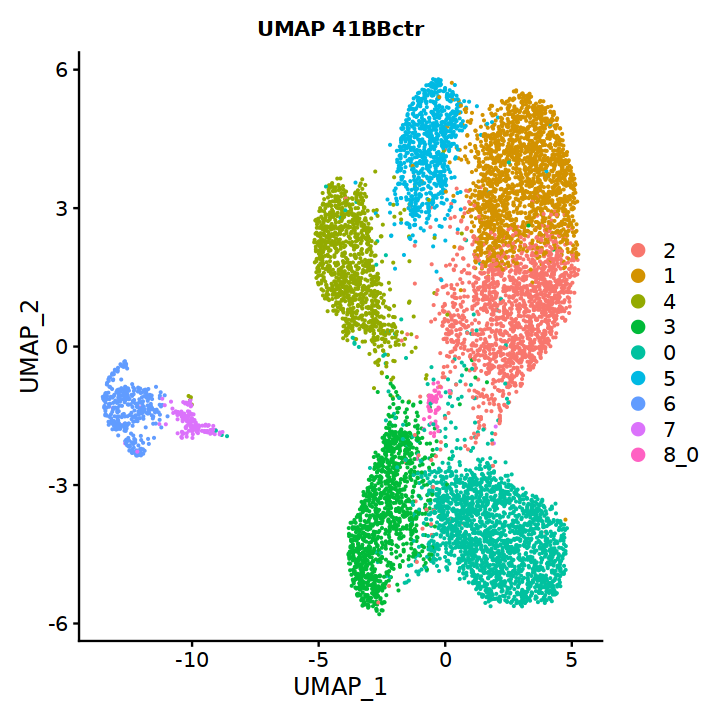

In [34]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  pt.size = 0.1
) + ggtitle(glue('UMAP {sample}')) + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

In [35]:
# Find the K-nearest neighbors
seurat_obj <- FindNeighbors(seurat_obj, reduction = "pca", dims = 1:20)
# Find clusters at different resolutions
clusters_df <- cluster_diff_resolutions(
  seurat_obj = seurat_obj,
  min_resolution = 0.1,
  max_resolution = 1.0,
  step = 0.1
)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8986
Number of edges: 311516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9499
Number of communities: 4
Elapsed time: 1 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8986
Number of edges: 311516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9257
Number of communities: 7
Elapsed time: 1 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8986
Number of edges: 311516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9049
Number of communities: 7
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8986
Number of edges: 311516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8847
Number of communities: 8
Elapsed time: 0 seconds
Modularity Optimizer

In [36]:
list_plots <- lapply(unique(clusters_df$resolution), function(x) {
  p <- add_reso_results(seurat_obj, clusters_df, resolution=x)
  umap <- DimPlot(p, reduction = "umap", 
                  group.by=glue::glue("seurat_clusters")) +
    labs(title=glue::glue("Resolution {x}"))
  return(umap)
})

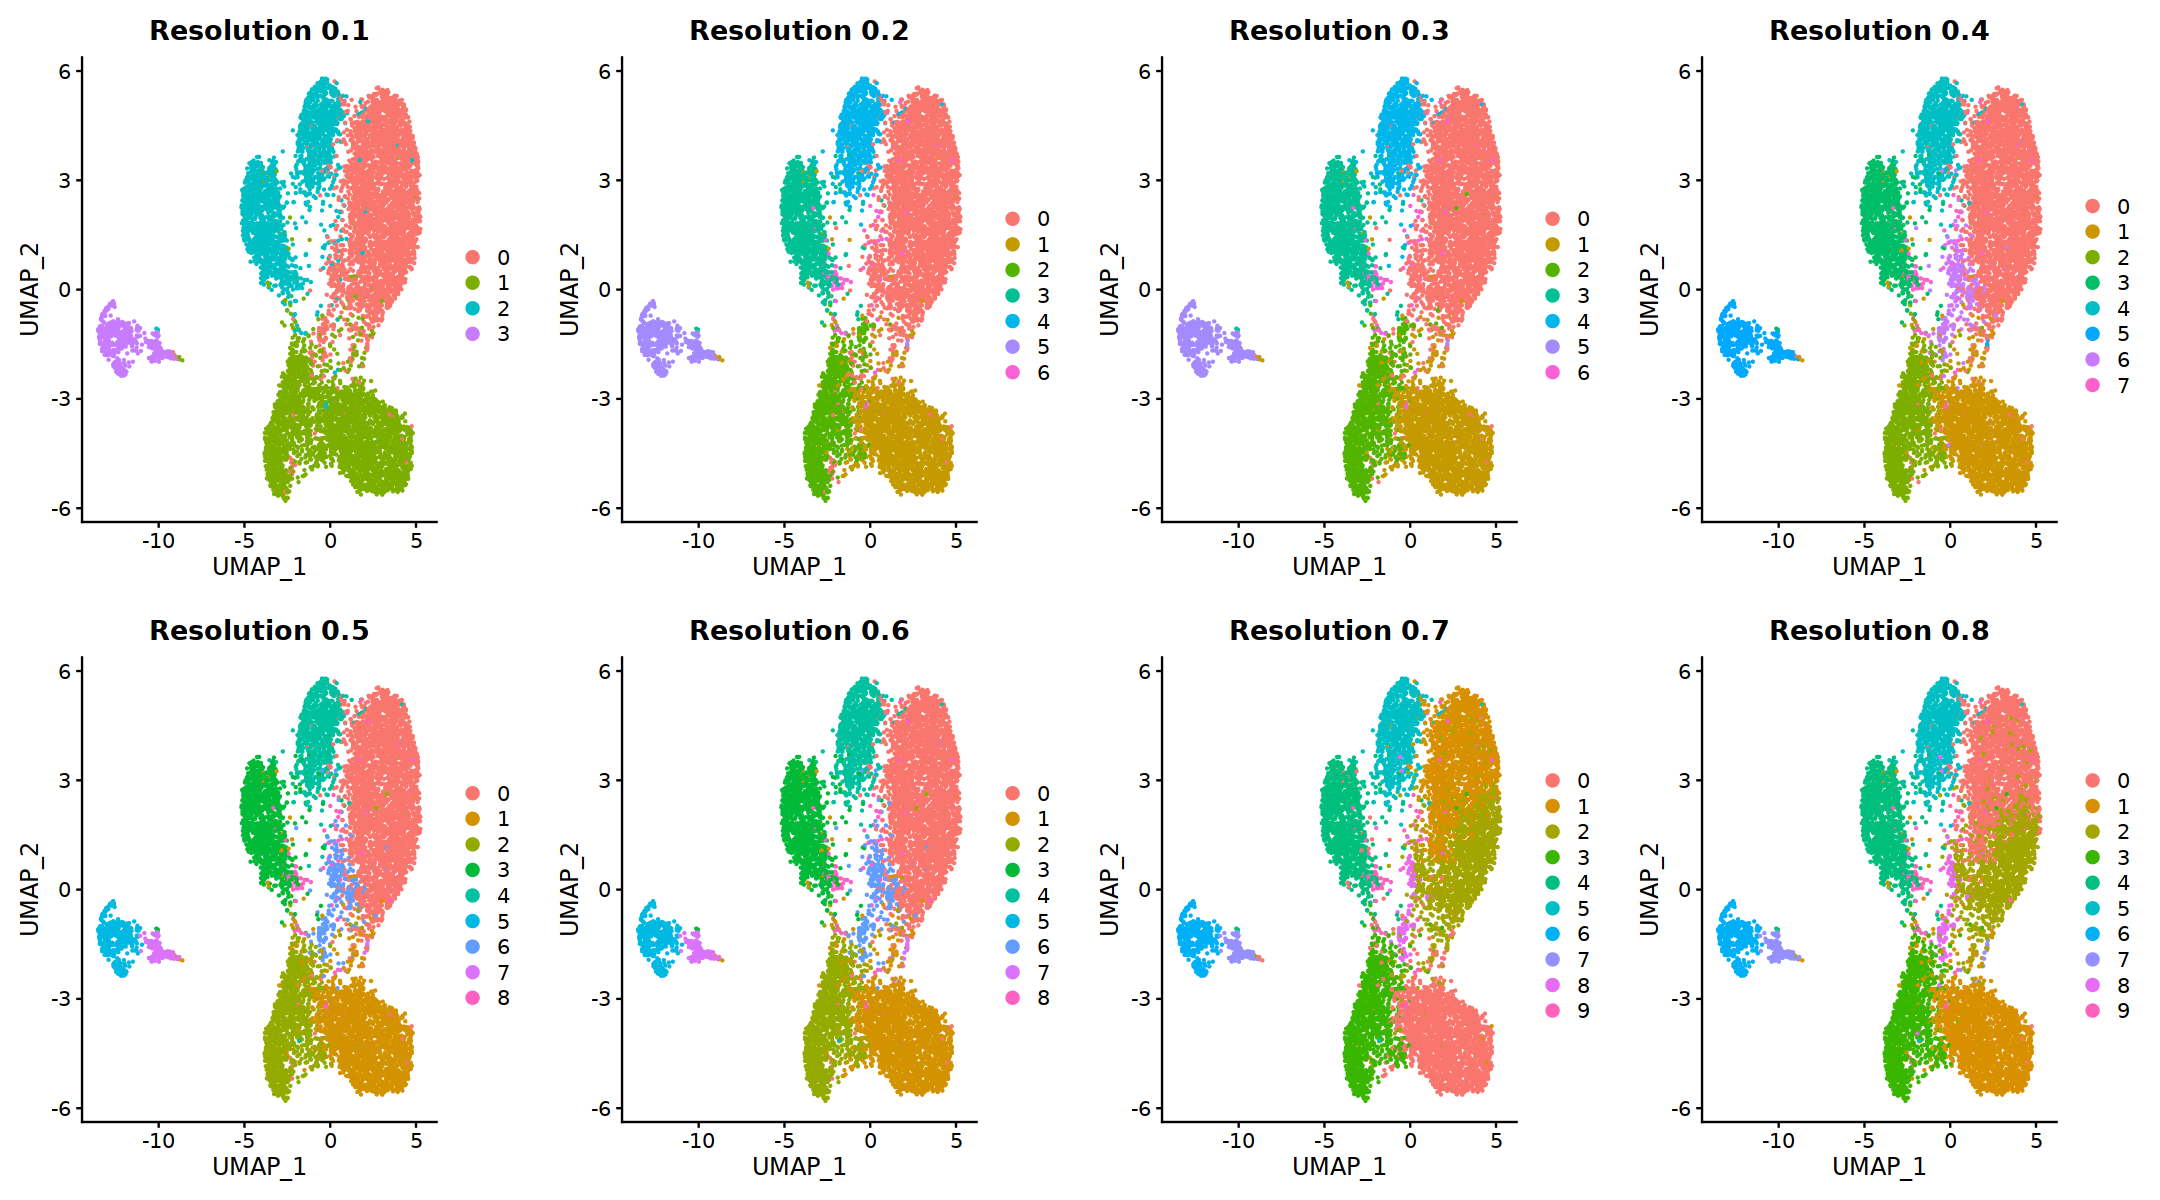

In [37]:
options(repr.plot.width = 18, repr.plot.height = 10, warn=-1,verbose = FALSE)
cp <- cowplot::plot_grid(plotlist = list_plots,
                   align = "hv",
                   axis = "trbl",
                   ncol=4,
                   nrow=2)
cp

In [38]:
reso = 0.4

In [39]:
seurat_obj <- FindClusters(seurat_obj, resolution = reso)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8986
Number of edges: 311516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8847
Number of communities: 8
Elapsed time: 0 seconds


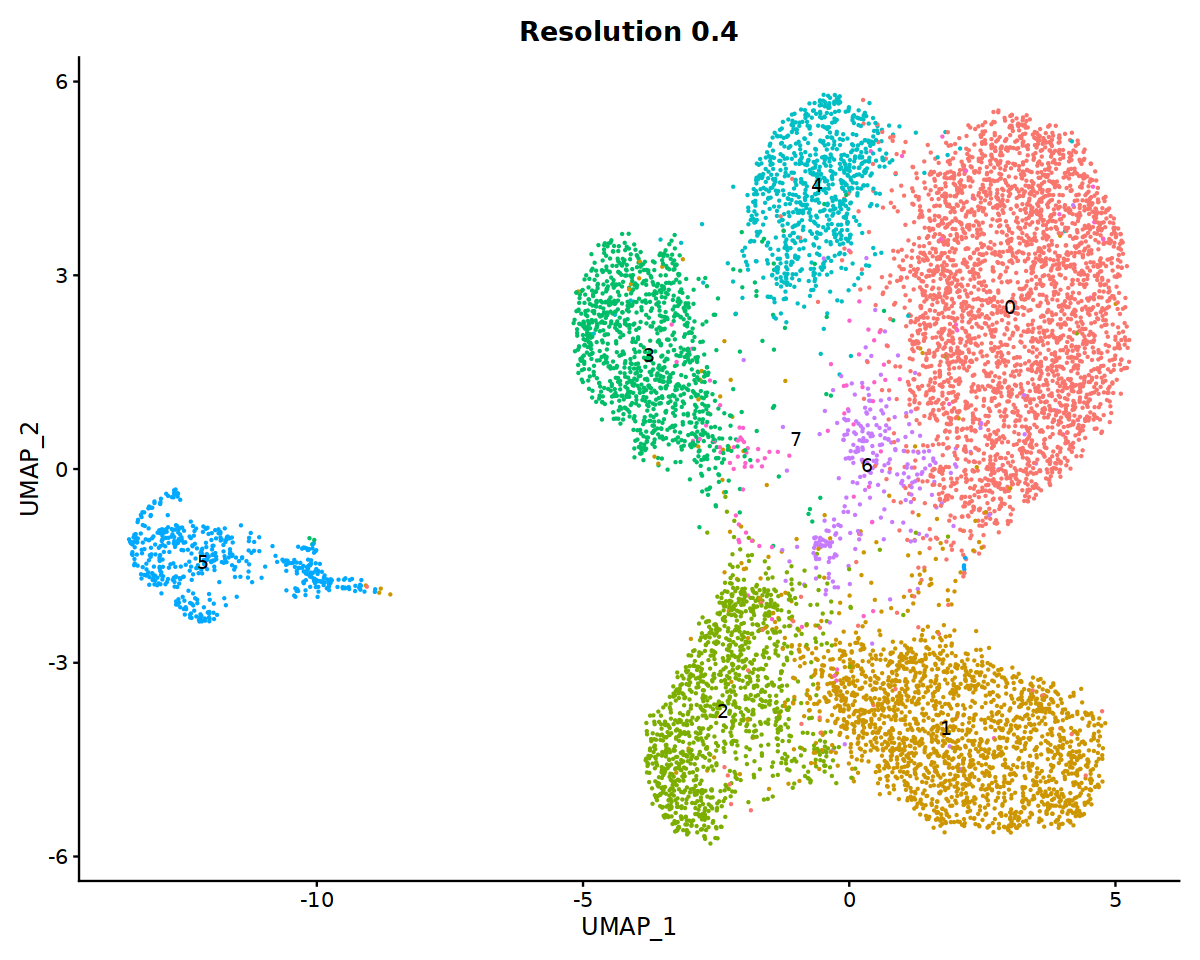

In [40]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(seurat_obj, reduction = "umap", label = T)+ NoLegend() +
  labs(title=glue("Resolution {reso}")) + theme(plot.title = element_text(hjust = 0.5))

In [41]:
rna.markers <- FindAllMarkers(seurat_obj, min.pct = 0.1, 
                              logfc.threshold = 0.1, only.pos = T,
                              random.seed=0, max.cells.per.ident=1000)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



In [42]:
cat_vars <-c("Phase")
con_vars <- c("TOP2A","STMN1","CD3E", "CD3D","TNFRSF9",
              "CD4", "CD8A","CD8B","SELL","IL7R", 
              "CCL5", "GZMB")
vars <- c(cat_vars, con_vars)

In [43]:
# compute plots
list_plots <- lapply(vars, function(var){
  if (var %in% cat_vars) {
      p <- DimPlot(seurat_obj, reduction = "umap", group.by=var)
  } else {
      p <- FeaturePlot(seurat_obj, reduction = "umap", feature=var, 
                       order = TRUE)
  }
  return(p)
})

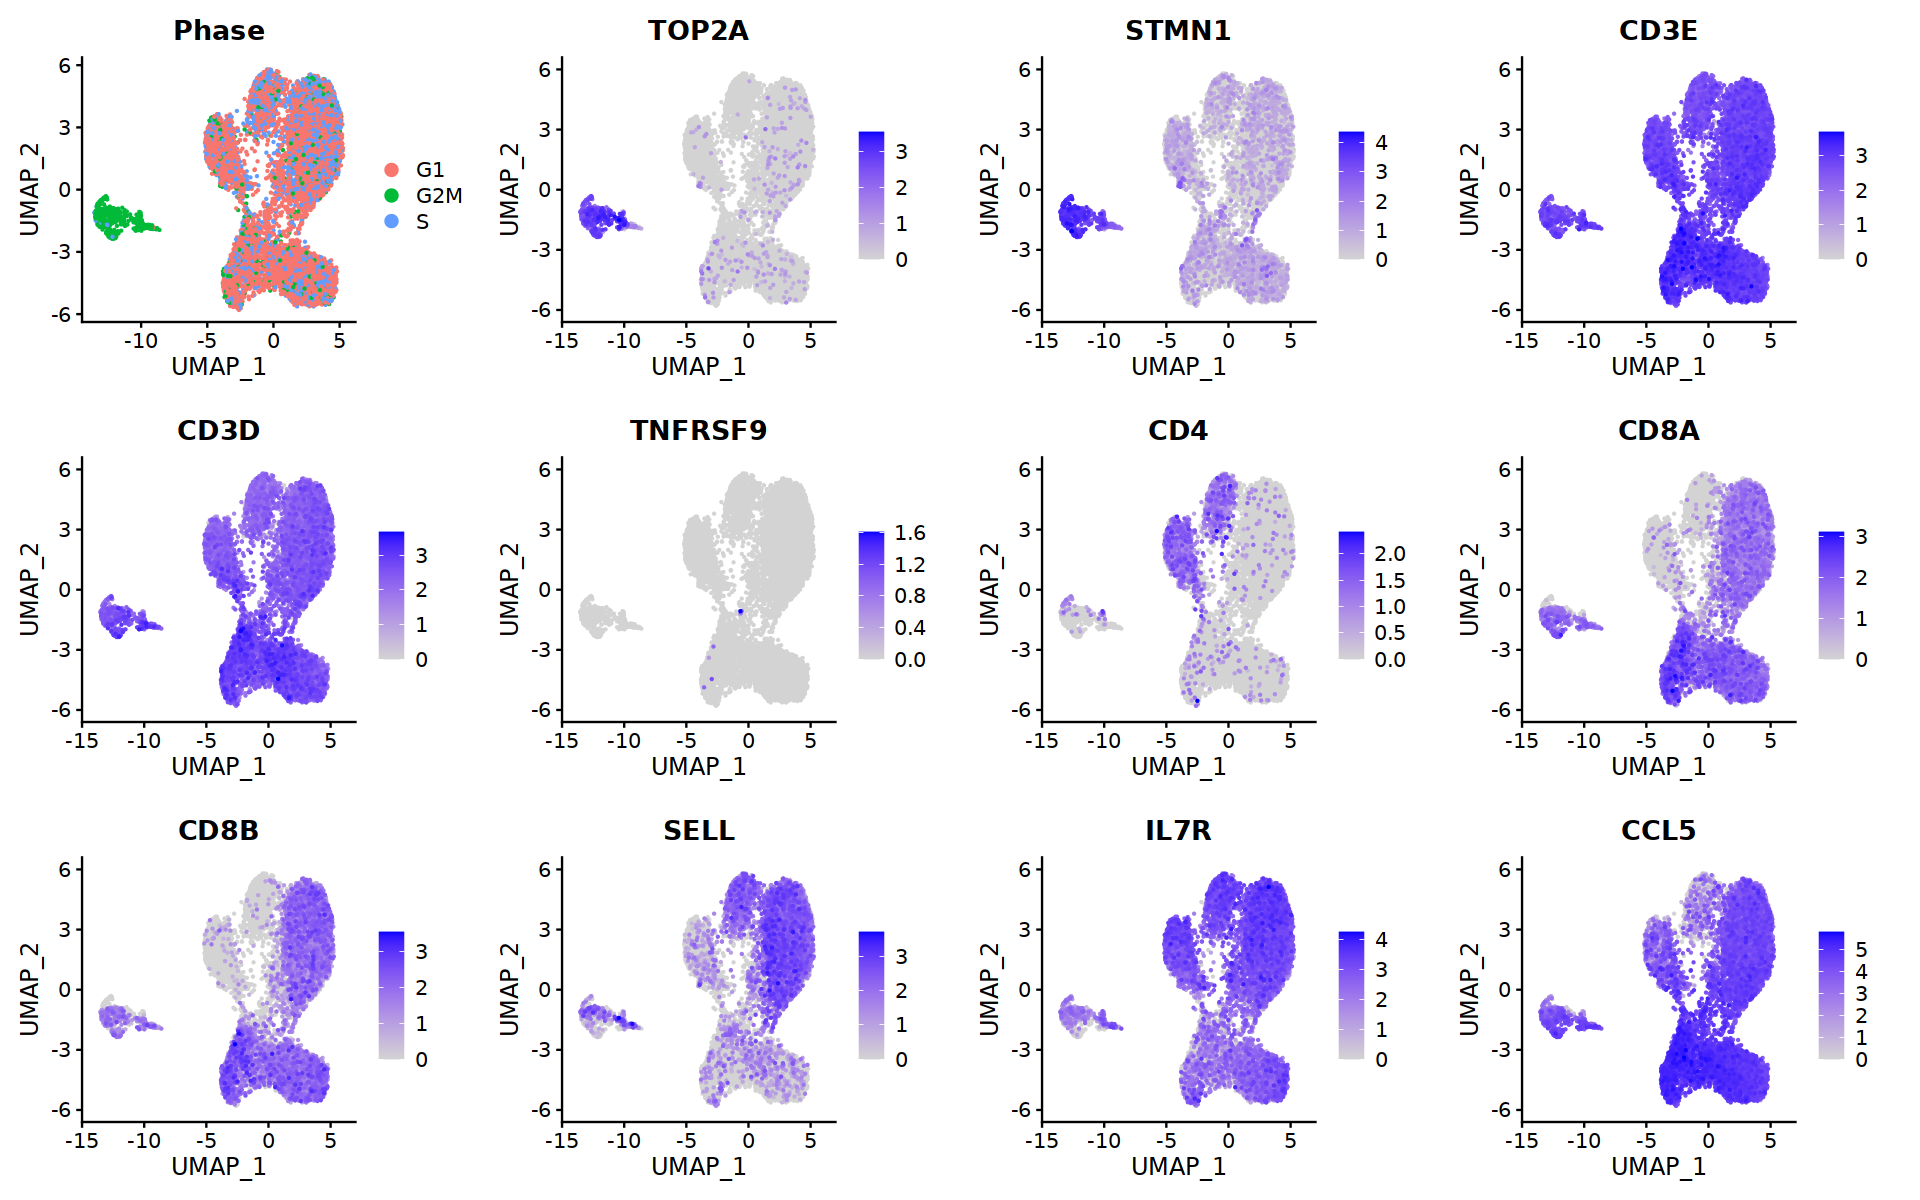

In [44]:
options(repr.plot.width = 16, repr.plot.height = 10, warn=-1,verbose = FALSE)
# show plots
cp <- cowplot::plot_grid(plotlist = list_plots,
                   align = "hv",
                   axis = "trbl",
                   ncol = 4,
                   nrow = 3)
cp

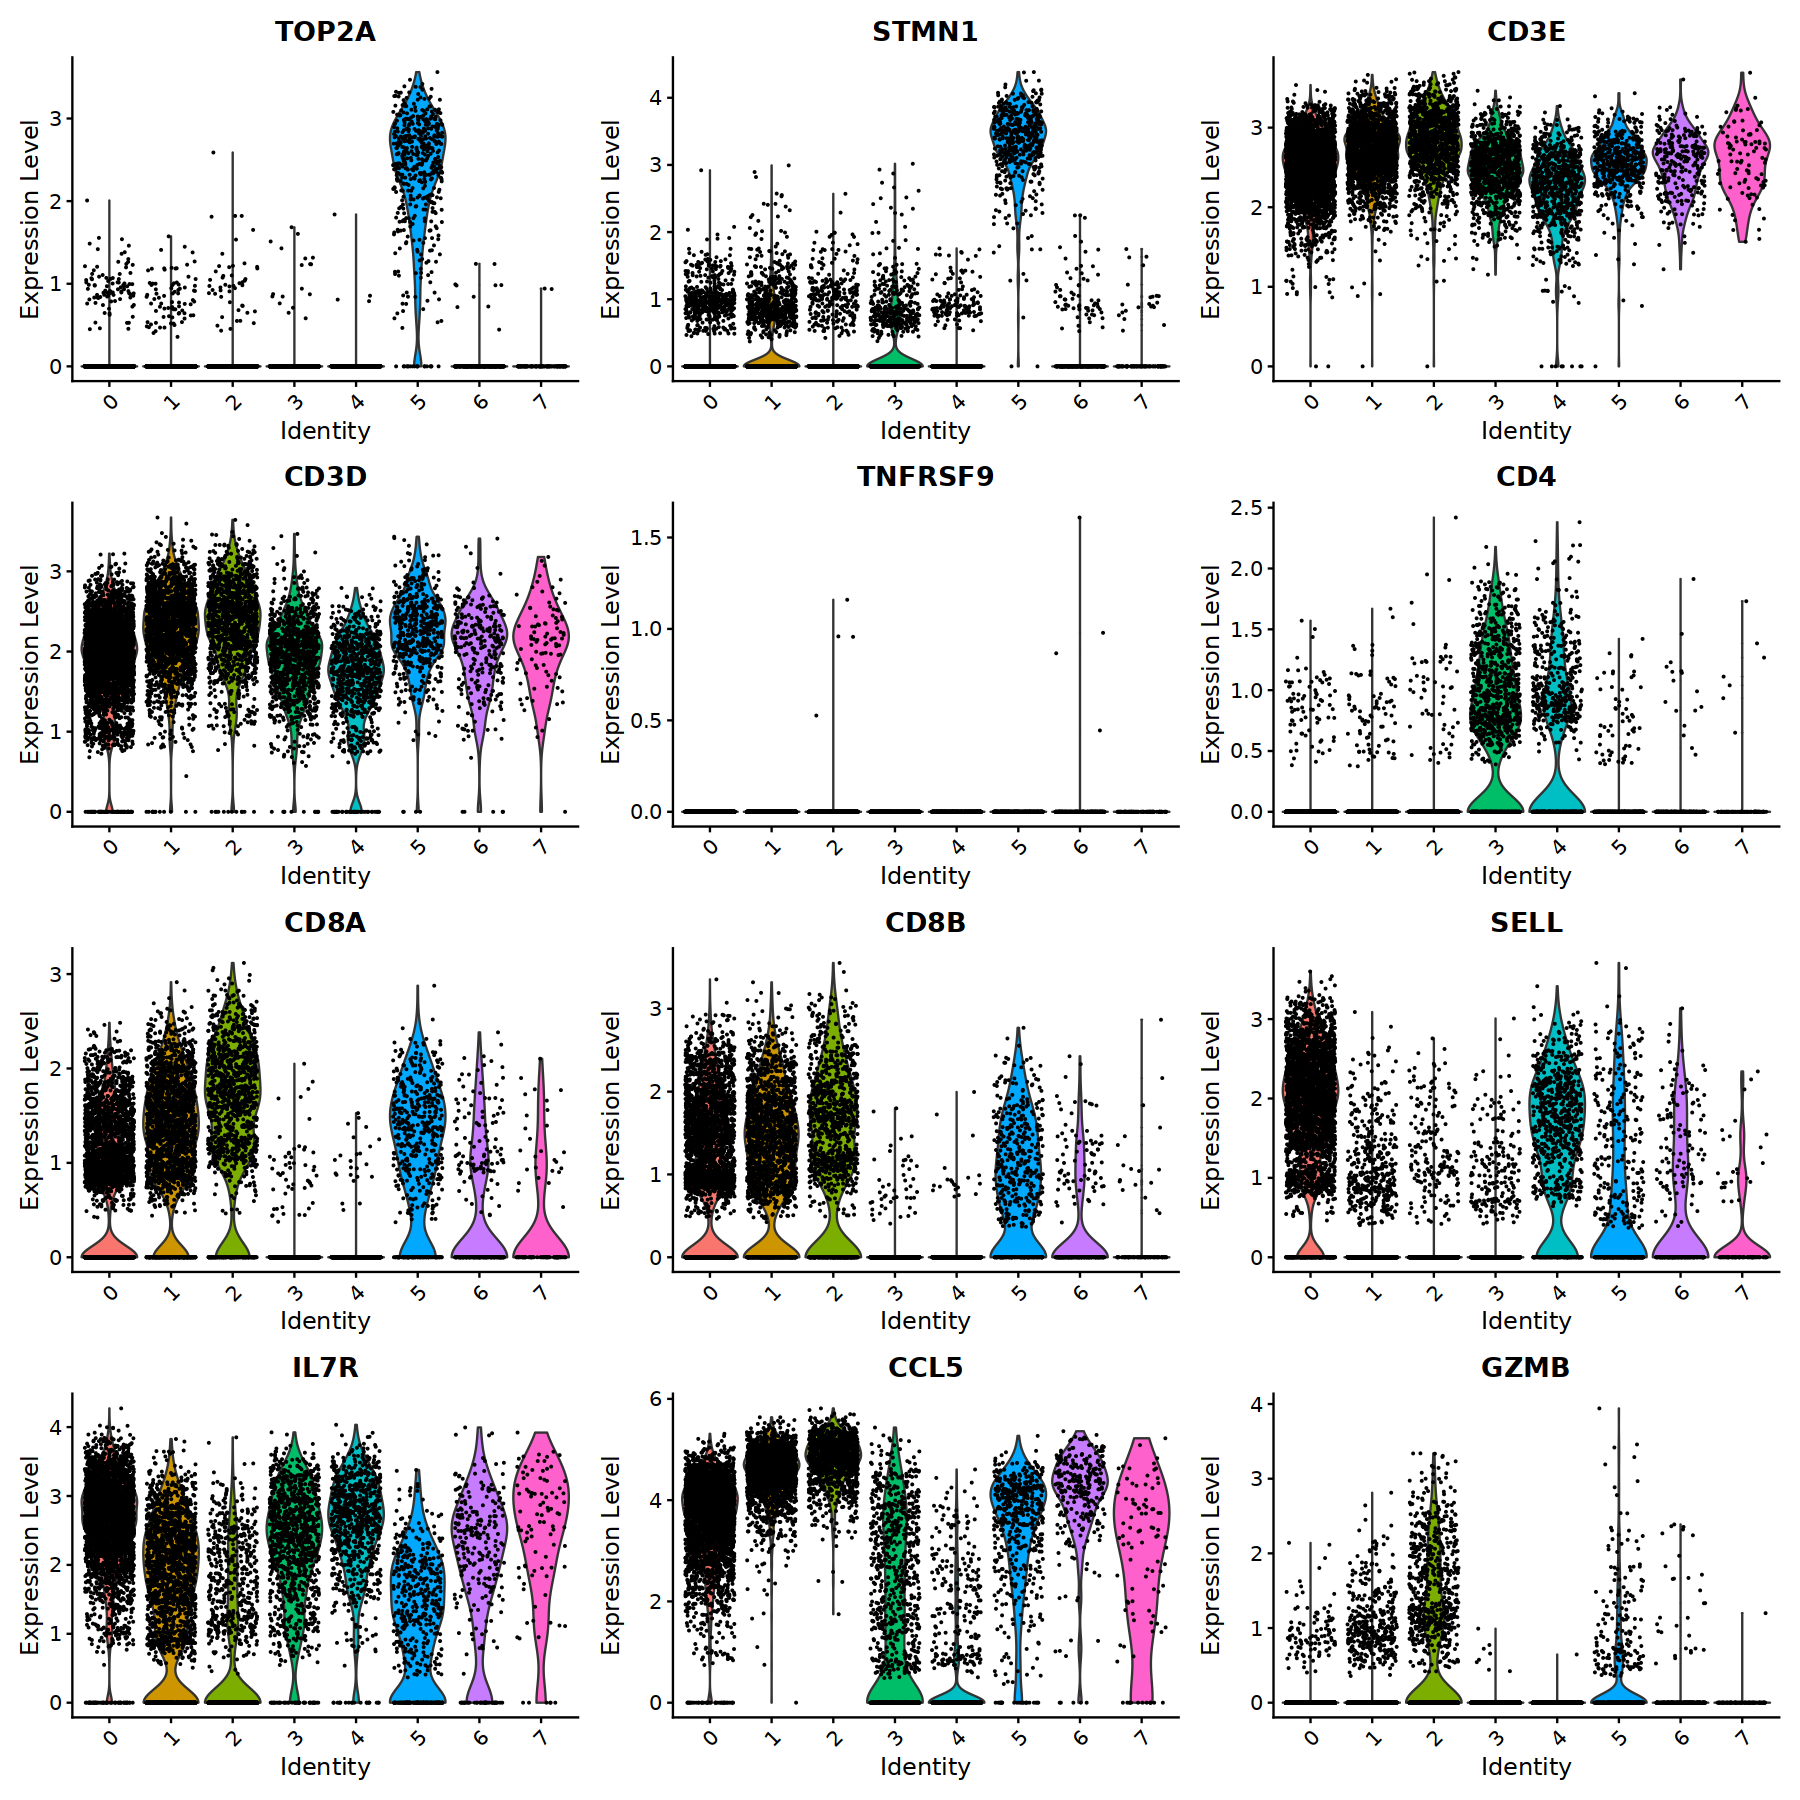

In [45]:
options(repr.plot.width = 15, repr.plot.height = 15, warn=-1,verbose = FALSE)

VlnPlot(seurat_obj,feature=con_vars, ncol=3, pt.size = 0)

In [46]:
seurat_obj$clusters <- Idents(seurat_obj)

# Save

In [47]:
saveRDS(seurat_obj, here(glue("{clust}/{robj_dir}/3.2-clustering_{sample}.rds")))

In [48]:
write_csv(rna.markers, here(glue("{clust}/{robj_dir}/3.2-clustering_{sample}.csv")))

# Session Info

In [49]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/groups/singlecell/isentis/conda_envs/ines_r4.1.1c/lib/libopenblasp-r0.3.24.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_ES.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=es_ES.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=es_ES.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_ES.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] scran_1.22.1                scater_1.22.0              
 [3] scuttle_1.4.0               SingleCellExperiment_1.16.0
 [5] SummarizedExperiment_1.24.0 Biobase_2.54.0             
 [7] GenomicRanges_1.46.1        GenomeInfoDb_1.30.1        
 [9] IRanges_